In [7]:
%matplotlib inline

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [156]:
Gamma = 0.95
Width = 12
Height = 4
Stage = np.zeros((Height, Width))
Stage[Height-1][1:Width-1] = 1
Actions = np.array([[-1, 0], [0, 1], [1, 0], [0, -1]])

<AxesSubplot:>

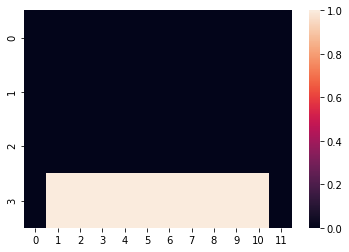

In [157]:
sns.heatmap(Stage)

In [158]:
def environment(state, action):
    # action - 0: up
    #          1: right
    #          2: down
    #          3: left
    state = state + Actions[action]
    state[0] = max(0, min(state[0], Height-1))
    state[1] = max(0, min(state[1], Width-1))
    
    reward = -1
    goal = False
    if state[0] == Height-1 and state[1] == Width-1:
        goal = True
        reward = 0
    elif Stage[state[0]][state[1]] == 1:
        state[0] = Height - 1
        state[1] = 0
        reward = -100
    
    return state, reward, goal

In [159]:
def test(q):
    rewards = 0
    state = np.array([Height-1, 0])
    for _ in range(100):
        action = np.argmax(q[state[0], state[1]])
        next_state, reward, goal = environment(state, action)
        rewards = rewards + reward
        state = next_state
        if goal is True:
            break
    return rewards

In [160]:
def initiate_q():
    q = np.zeros((Height, Width, 4))
    for i in range(Height):
        q[i][0][3] = q[i][Width-1][1] = -1000
    for j in range(Width):
        q[0][j][0] = q[Height-1][j][2] = -1000
    return q

# Q-learning

In [161]:
alpha = 0.5
epsilon = 0.1
q = initiate_q()
rewards = [0] * 500
for episode in range(500):
    state = np.array([Height-1, 0])
    while True:
        # epsilon-greedy
        action = np.argmax(q[state[0], state[1]])
        if np.random.rand() < epsilon:
            action = np.random.randint(0,4)

        next_state, reward, goal = environment(state, action)
        rewards[episode] = reward + Gamma * rewards[episode]
        td = alpha * (reward + Gamma * np.max(q[next_state[0], next_state[1]]) - q[state[0], state[1], action])
        q[state[0], state[1], action] = q[state[0], state[1], action] + td
        state = next_state
        if goal is True:
            break

(-100.0, 0.0)

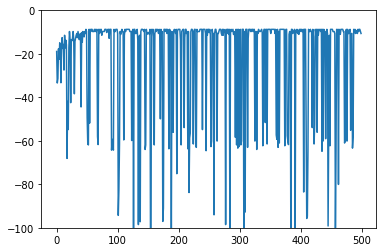

In [162]:
plt.plot(np.arange(0, 500), rewards)
plt.ylim(-100, 0)